In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
from scipy.fftpack import fft
from scipy import interpolate

import pandas as pd

%matplotlib inline

In [3]:
x = (pd.read_csv("/home/ishanjo/Desktop/chanelA.txt"))
y = (pd.read_csv("/home/ishanjo/Desktop/ChanelB.txt"))
x = np.squeeze(x.to_numpy())
y = np.squeeze(y.to_numpy())

In [4]:
Sample_rate= 256
SegmentDuration = 100

In [15]:
def wiener(sw):
    wx = x[0:SegmentDuration*Sample_rate*sw]
    wy = y[0:SegmentDuration*Sample_rate*sw]

    for i in range(sw):
        j = i*SegmentDuration*Sample_rate
        k = (i+1)*SegmentDuration*Sample_rate
        tx = wx[j:k]
        ty = wy[j:k]
        if i==0:
            tf = np.fft.rfft(sig.hann(len(tx))*tx)/np.fft.rfft(sig.hann(len(ty))*ty)
        else:
            tf += np.fft.rfft(sig.hann(len(tx))*tx)/np.fft.rfft(sig.hann(len(ty))*ty)
    tf = tf/sw

    f = np.fft.rfftfreq(SegmentDuration*Sample_rate,d=1./Sample_rate)

    #Coherence Cut
    f1 ,cohsignal = sig.coherence(wx,wy,fs=Sample_rate,window='hann',nperseg=SegmentDuration*Sample_rate)
    cohThreshold = 0.9
    tf[cohsignal < cohThreshold] = 0
    
    #Plot Filter
    plt.figure(figsize=(15,4))

    #plt.subplot(121)
    plt.plot(f, np.abs(tf), label=r' Wiener Function ')
    plt.grid()
    plt.xlabel('Freq(Hz)')
    plt.ylabel('Amplitude')
    plt.legend()


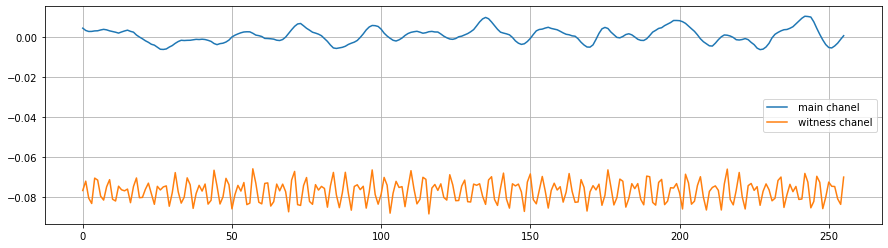

In [9]:
plt.figure(figsize=(15,4))
plt.plot(x[0:Sample_rate] , label=r' main chanel')
plt.plot(y[0:Sample_rate] , label=r' witness chanel')
plt.legend()
plt.grid()

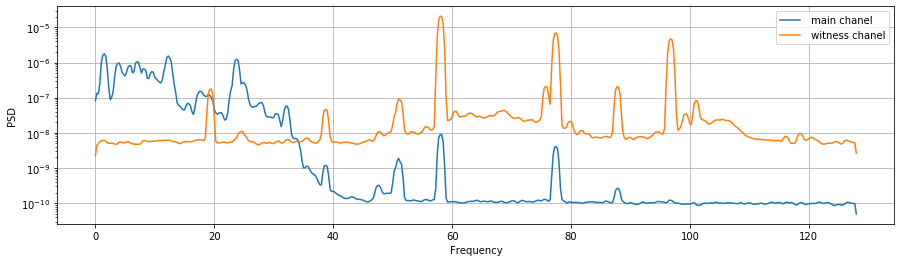

In [10]:
f1 , psdx = sig.welch(x,Sample_rate,'flattop',1024,scaling='spectrum')
f2 , psdy = sig.welch(y,Sample_rate,'flattop',1024,scaling='spectrum')
plt.figure(figsize=(15,4))
plt.semilogy(f1,psdx, label=r' main chanel')
plt.semilogy(f1,psdy, label=r' witness chanel')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()
plt.legend()

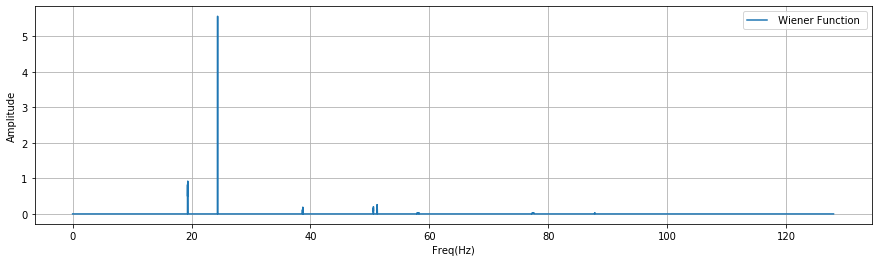

In [16]:
#Wiener filter
wiener(sw = 6)

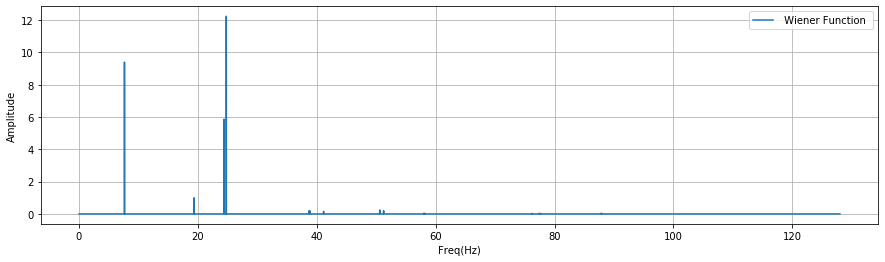

In [19]:
wiener(sw = 3)

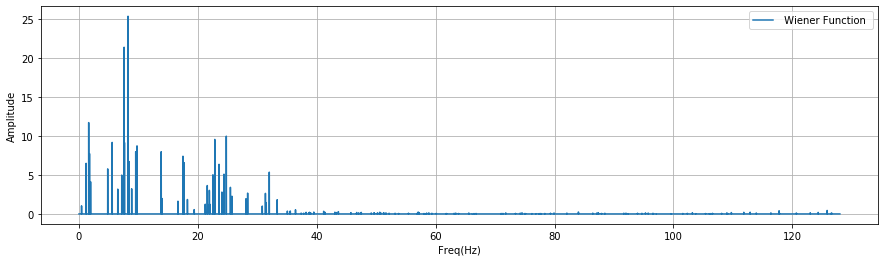

In [20]:
wiener(sw = 2)

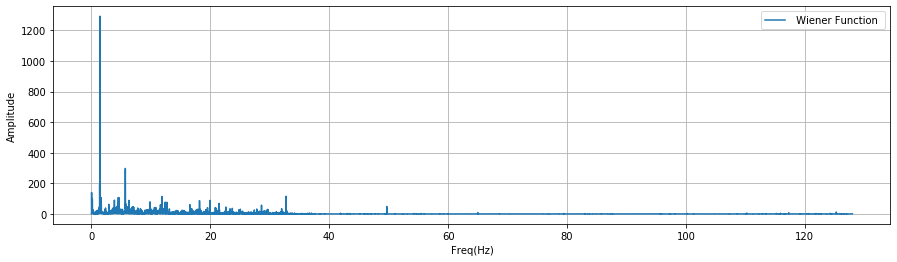

In [21]:
wiener(sw = 1)

In [23]:
wiener(sw = 7)

ValueError: operands could not be broadcast together with shapes (12801,) (5701,) (12801,) 